In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lasso_path
from itertools import cycle

%matplotlib inline

In [2]:
df = pd.read_csv('../data/lasso-covid19India.csv')
df.head()

,State_Code,State,District,Confirmed,Active,Recovered,Deceased,"Sex ratio of the total population (females per 1,000 males)",Women whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2)14 (%),Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%),Women who are overweight or obese (BMI ≥ 25.0 kg/m2)14 (%),Men who are overweight or obese (BMI ≥ 25.0 kg/m2) (%),All women age 15-49 years who are anaemic (%),Men age 15-49 years who are anaemic (<13.0 g/dl) (%),Women Blood sugar level - high (>140 mg/dl) (%),Men Blood sugar level - high (>140 mg/dl) (%),Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%),Men Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)
0,MH,Maharashtra,Pune,134913,39971,91606,3336,924,17.8,10.7,30.2,33.4,50.0,17.4,4.6,4.0,0.2,1.1
1,MH,Maharashtra,Mumbai,130410,17693,105193,7222,906,17.8,14.9,34.0,37.9,49.4,23.0,11.8,14.0,0.2,0.0
2,TN,Tamil Nadu,Chennai,119059,12106,104455,2498,1032,9.4,4.3,33.6,31.3,53.9,10.1,9.7,9.3,0.4,3.0
3,MH,Maharashtra,Thane,115923,19541,92981,3400,922,21.4,13.1,29.0,27.4,48.4,17.1,4.1,4.5,0.6,0.0
4,KA,Karnataka,Bangalore,94106,33081,59492,1532,898,14.0,8.7,32.0,26.1,39.6,20.5,8.3,10.9,0.4,0.7


In [3]:
df = df[df['Deceased'] >= 5]
len(df)

411

In [4]:
print('number of confirmed cases :', df['Confirmed'].sum())
print('number of deceased cases :', df['Deceased'].sum())

number of confirmed cases : 2331363
number of deceased cases : 46239


In [5]:
d = df[df['Deceased'] > 100]
len(d)

81

In [6]:
d = df[df['Confirmed'] > 2000]
len(d)

213

In [7]:
d = df[['State', 'District', 'Confirmed', 'Active', 'Recovered',
       'Deceased']]
d.head()

,State,District,Confirmed,Active,Recovered,Deceased
0,Maharashtra,Pune,134913,39971,91606,3336
1,Maharashtra,Mumbai,130410,17693,105193,7222
2,Tamil Nadu,Chennai,119059,12106,104455,2498
3,Maharashtra,Thane,115923,19541,92981,3400
4,Karnataka,Bangalore,94106,33081,59492,1532


In [8]:
df.isna().sum()

State_Code                                                                     0
State                                                                          0
District                                                                       0
Confirmed                                                                      0
Active                                                                         0
Recovered                                                                      0
Deceased                                                                       0
Sex ratio of the total population (females per 1,000 males)                    0
Women whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2)14 (%)     0
Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%)         0
Women who are overweight or obese (BMI ≥ 25.0 kg/m2)14 (%)                     0
Men who are overweight or obese (BMI ≥ 25.0 kg/m2) (%)                         0
All women age 15-49 years wh

In [9]:
dict(df['District'].value_counts())

{'Aurangabad': 2,
 'Raigarh': 2,
 'Baramula': 1,
 'Auraiya': 1,
 'Patan': 1,
 'Erode': 1,
 'Shahjahanpur': 1,
 'Bhavnagar': 1,
 'Sant Kabir Nagar': 1,
 'Jalandhar': 1,
 'Ranchi': 1,
 'Badgam': 1,
 'Ariyalur': 1,
 'Gaya': 1,
 'Bandipore': 1,
 'Dhanbad': 1,
 'Vidisha': 1,
 'Viluppuram': 1,
 'Deoria': 1,
 'Mandsaur': 1,
 'Nawada': 1,
 'Leh(Ladakh)': 1,
 'Kota': 1,
 'Neemuch': 1,
 'Y.S.R.': 1,
 'Kapurthala': 1,
 'Rup Nagar': 1,
 'Nagaur': 1,
 'Rohtak': 1,
 'Thiruvarur': 1,
 'Patiala': 1,
 'Jammu': 1,
 'Nanded': 1,
 'Jajapur': 1,
 'Perambalur': 1,
 'Sahibganj': 1,
 'Barnala': 1,
 'Fatehpur': 1,
 'Thiruvallur': 1,
 'Moradabad': 1,
 'East Godavari': 1,
 'Chennai': 1,
 'Tarn Taran': 1,
 'Bagalkot': 1,
 'Damoh': 1,
 'Gadag': 1,
 'Dakshina Kannada': 1,
 'Rajgarh': 1,
 'Virudhunagar': 1,
 'Gandhinagar': 1,
 'Kishanganj': 1,
 'Sundargarh': 1,
 'Ujjain': 1,
 'Mahamaya Nagar': 1,
 'Mainpuri': 1,
 'Bid': 1,
 'Jhunjhunun': 1,
 'Arwal': 1,
 'Bara Banki': 1,
 'Bangalore': 1,
 'Jhansi': 1,
 'Nagaon': 1,


In [10]:
# missing UT and states
# UT - Andaman, Daman, Delhi, Chandigarh, Lakshwadeep 
# States - Arunachal Pradesh, Manipur, Meghalaya, Mizoram, Sikkim
sorted(list(df['State'].unique()))

['Andhra Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [11]:
df['Mortality'] = df['Deceased'] / df['Confirmed']
df.head()

,State_Code,State,District,Confirmed,Active,Recovered,Deceased,"Sex ratio of the total population (females per 1,000 males)",Women whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2)14 (%),Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%),Women who are overweight or obese (BMI ≥ 25.0 kg/m2)14 (%),Men who are overweight or obese (BMI ≥ 25.0 kg/m2) (%),All women age 15-49 years who are anaemic (%),Men age 15-49 years who are anaemic (<13.0 g/dl) (%),Women Blood sugar level - high (>140 mg/dl) (%),Men Blood sugar level - high (>140 mg/dl) (%),Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%),Men Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%),Mortality
0,MH,Maharashtra,Pune,134913,39971,91606,3336,924,17.8,10.7,30.2,33.4,50.0,17.4,4.6,4.0,0.2,1.1,0.024727
1,MH,Maharashtra,Mumbai,130410,17693,105193,7222,906,17.8,14.9,34.0,37.9,49.4,23.0,11.8,14.0,0.2,0.0,0.055379
2,TN,Tamil Nadu,Chennai,119059,12106,104455,2498,1032,9.4,4.3,33.6,31.3,53.9,10.1,9.7,9.3,0.4,3.0,0.020981
3,MH,Maharashtra,Thane,115923,19541,92981,3400,922,21.4,13.1,29.0,27.4,48.4,17.1,4.1,4.5,0.6,0.0,0.029330
4,KA,Karnataka,Bangalore,94106,33081,59492,1532,898,14.0,8.7,32.0,26.1,39.6,20.5,8.3,10.9,0.4,0.7,0.016280


In [12]:
m = ['Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%)',
       'Men who are overweight or obese (BMI ≥ 25.0 kg/m2) (%)',
       'Men age 15-49 years who are anaemic (<13.0 g/dl) (%)',
       'Men Blood sugar level - high (>140 mg/dl) (%)',
       'Men Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)']

f = ['Women whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2)14 (%)',
     'Women who are overweight or obese (BMI ≥ 25.0 kg/m2)14 (%)',
     'All women age 15-49 years who are anaemic (%)',
     'Women Blood sugar level - high (>140 mg/dl) (%)',
     'Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)',
    ]

a = ['BMI below normal',
     'Overweight or obese',
     'Anaemia',
     'High blood sugar level',
     'Very high blood pressure'
    ]

for i in range(len(m)):
    df[a[i]] = (df[m[i]] * 1000 + df[f[i]] * df['Sex ratio of the total population (females per 1,000 males)']) / (1000 + df['Sex ratio of the total population (females per 1,000 males)'])

df.head()

,State_Code,State,District,Confirmed,Active,Recovered,Deceased,"Sex ratio of the total population (females per 1,000 males)",Women whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2)14 (%),Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%),...,Women Blood sugar level - high (>140 mg/dl) (%),Men Blood sugar level - high (>140 mg/dl) (%),Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%),Men Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%),Mortality,BMI below normal,Overweight or obese,Anaemia,High blood sugar level,Very high blood pressure
0,MH,Maharashtra,Pune,134913,39971,91606,3336,924,17.8,10.7,...,4.6,4.0,0.2,1.1,0.024727,14.109771,31.863202,33.056133,4.288150,0.667775
1,MH,Maharashtra,Mumbai,130410,17693,105193,7222,906,17.8,14.9,...,11.8,14.0,0.2,0.0,0.055379,16.278489,36.046170,35.549003,12.954250,0.095068
2,TN,Tamil Nadu,Chennai,119059,12106,104455,2498,1032,9.4,4.3,...,9.7,9.3,0.4,3.0,0.020981,6.890157,32.468110,32.344882,9.503150,1.679528
3,MH,Maharashtra,Thane,115923,19541,92981,3400,922,21.4,13.1,...,4.1,4.5,0.6,0.0,0.029330,17.081582,28.167534,32.114880,4.308117,0.287825
4,KA,Karnataka,Bangalore,94106,33081,59492,1532,898,14.0,8.7,...,8.3,10.9,0.4,0.7,0.016280,11.207587,28.891465,29.536776,9.669863,0.558061


In [13]:
def make_lasso_plots(df, y_col_name, x_col_names, legend_names, title_name):
    y = df[y_col_name]
    x = df[x_col_names]
    
    x = x.to_numpy()
    y = y.to_numpy()

    y = y.reshape(-1,1)

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    scaler = StandardScaler()
    y = scaler.fit_transform(y)
    
    eps = 1e-4
    alphas_lasso, coefslasso, _  = lasso_path(x, y, eps=eps, fit_intercept=False)
    coefs_lasso = coefslasso.reshape(5,100)
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    
    plt.figure(figsize=(20,15))
    plt.figure(1)
    colors = cycle(['#008080','#ffa500','#00ff00','#0000ff','#ff1493'])
    neg_log_alphas_lasso = np.log10(alphas_lasso)
    for coef_l,c,n in zip(coefs_lasso,colors,legend_names):
        plt.plot(neg_log_alphas_lasso, coef_l,c=c,label=n)

    plt.legend(loc='upper right', fontsize = 14)
    plt.xlabel(r'$log_{10}λ$', fontsize = 20)
    plt.ylabel('Coefficients', fontsize = 20)
    plt.title(title_name)
    plt.axis('tight')
    
    max_alpha = 0
    max_r2 = 0
    for alphas in alphas_lasso:
        clf = linear_model.Lasso(alpha=alphas)
        clf.fit(x,y)
        r2 = clf.score(x, y, sample_weight=None)
        if(r2 > max_r2):
            max_r2 = r2
            max_alpha = alphas
           
    print('max R2 :',max_r2)
    print('log(alpha corresponding to max R2) :',np.log10(max_alpha))
    print('alpha corresponding to max R2 :', max_alpha)
    return max_alpha

In [14]:
def make_residual_plots(alpha, y_col_name, x_col_names, label_names):
    y = df[y_col_name]
    x = df[x_col_names]
    
    x = x.to_numpy()
    y = y.to_numpy()

    y = y.reshape(-1,1)

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    scaler = StandardScaler()
    y = scaler.fit_transform(y)
    
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(x,y)
    
    y_hat = clf.predict(x)
    residual = y_hat - y.reshape(y_hat.shape)
    
    for i in range(len(x_col_names)):
        plt.figure(figsize = (15,8))
        plt.scatter(x[:,i],residual,color='red', label = 'Data points')
        plt.axhline(y=0, linestyle='--')
        plt.ylabel("Residuals")
        plt.xlabel(label_names[i])

max R2 : 0.10353467481249912
log(alpha corresponding to max R2) : -4.732000354654019
alpha corresponding to max R2 : 1.8535301097824744e-05


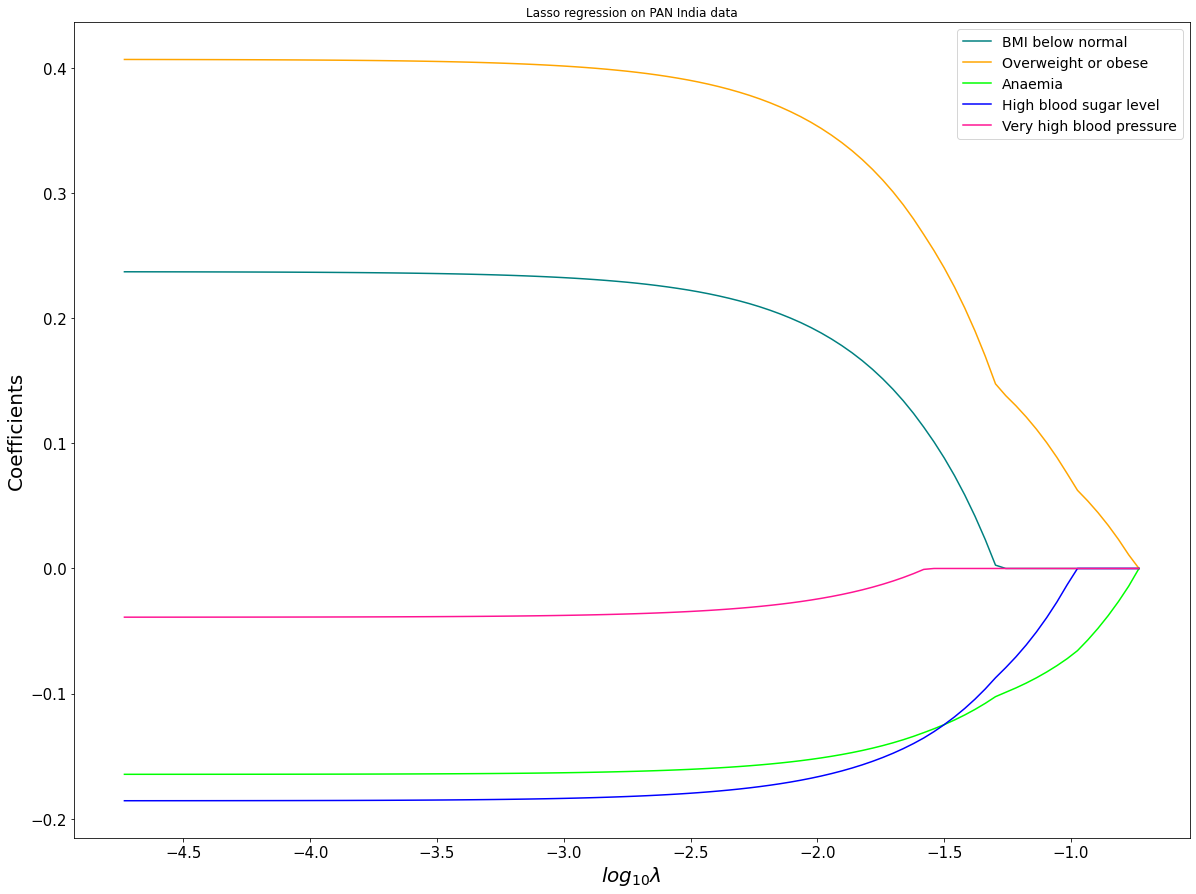

In [15]:
max_alpha = make_lasso_plots(df, 'Mortality', 
                ['BMI below normal',
                 'Overweight or obese',
                 'Anaemia',
                 'High blood sugar level',
                 'Very high blood pressure'], 
                ['BMI below normal',
                 'Overweight or obese',
                 'Anaemia',
                 'High blood sugar level',
                 'Very high blood pressure'],
                'Lasso regression on PAN India data')

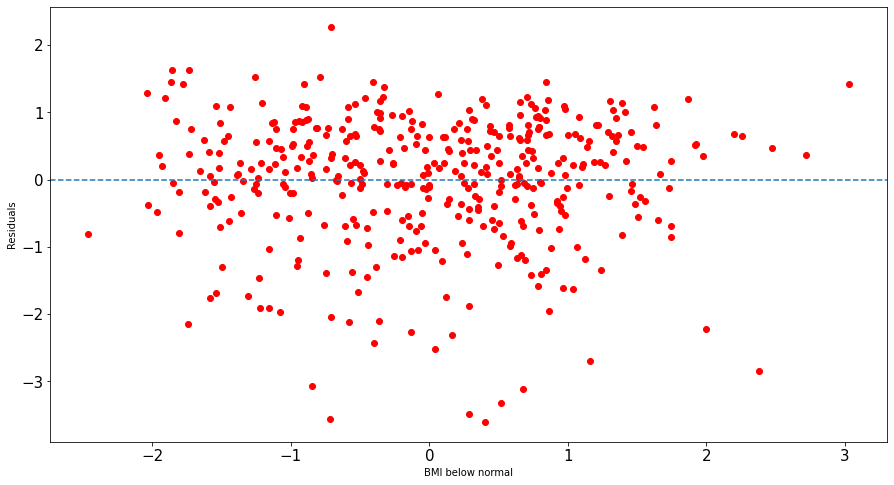

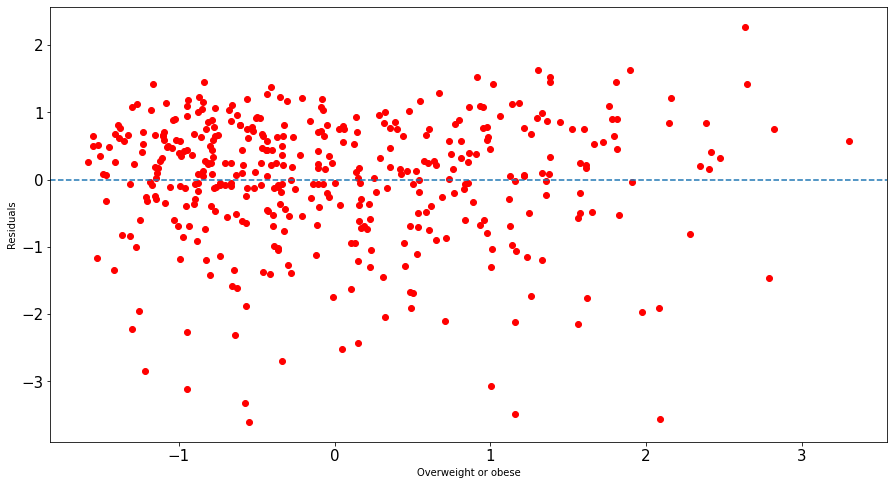

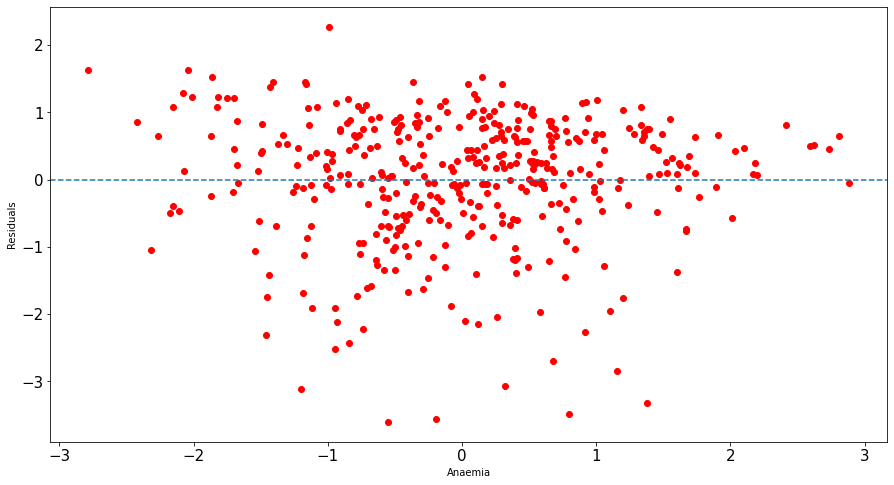

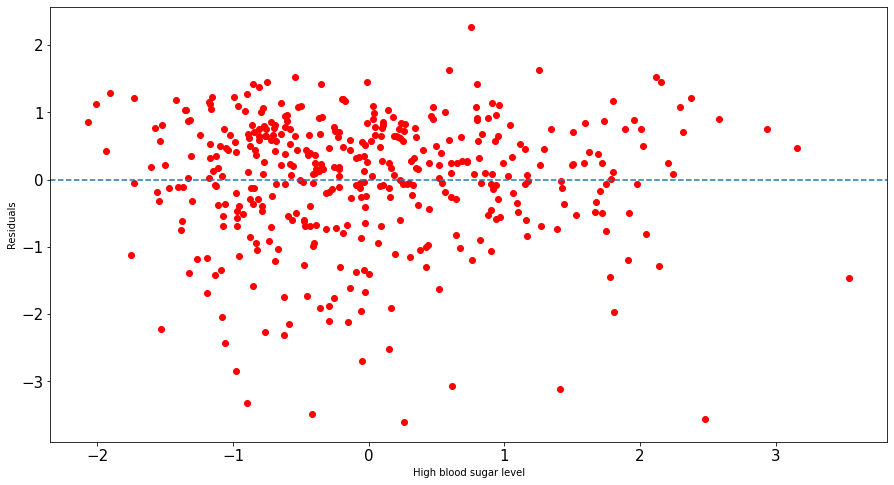

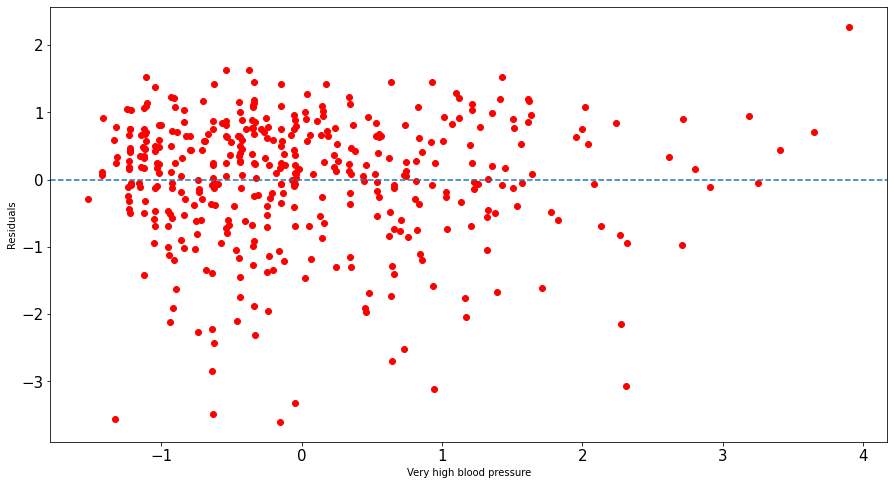

In [16]:
make_residual_plots(max_alpha, 'Mortality', 
                ['BMI below normal',
                 'Overweight or obese',
                 'Anaemia',
                 'High blood sugar level',
                 'Very high blood pressure'], 
                ['BMI below normal',
                 'Overweight or obese',
                 'Anaemia',
                 'High blood sugar level',
                 'Very high blood pressure'])